# Scott Miller CLUSTERING/MODALITY
I have to do clustering for my group project. 
As defined in Page 294 of O'Reilly Practical Statistics for data scientists, clustering is a technique to divide data into different groups, where the records in each group are similar to one another. The goal of clustering is to indentify significant and meaningful groups of data. 

#### Importing libraries

In [4]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 656.4 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/294.9 kB 1.3 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.9 kB 1.2 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/294.9 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import requests
from pandas import DataFrame, Series
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sb 
import plotly.express as px
from matplotlib.ticker import FuncFormatter

ModuleNotFoundError: No module named 'sklearn'

##### Importing dataset

In [82]:
cars = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

##### Creating data frame

In [83]:
cars_df = pd.DataFrame(cars)

#### EDA, Exploratory Data Analysis
1. Break out car name to get make & model, Add make and model to dataframe
2. Look at data types of columns 
3. Look at data itself in data frame
4. Get some base statistics with describe
5. Create columns in the dataframe with these descriptive statistcs
6. Do some analysis with these descriptive statistics
8. Determine where these values fall within descriptive statistics
9. Create histograms to analyze modality
10. Create cluster plots to validate any candidates for KMeans clustering analysis

In [84]:
car_name = cars_df.name
cars_df['make'] = cars_df.name.apply(lambda x: ''.join(x.split(' ')[0]))
cars_df['model'] = cars_df.name.apply(lambda x: ''.join(x.split(' ')[1:]))


display(cars_df.head(5))

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,make,model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800AC
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,WagonRLXIMinor
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna1.6SX
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGOTOption
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,AmazeVXi-DTEC


In [85]:
cars_df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
make             object
model            object
dtype: object

In [86]:
cars_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,make,model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800AC
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,WagonRLXIMinor
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna1.6SX
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGOTOption
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,AmazeVXi-DTEC


Lets get some default statistics with describe

In [87]:
cars_df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


#### Lets plot these descriptive statistics

In [88]:
#display(cars_df.selling_price.std())
#display(cars_df.selling_price.mean())
#display(cars_df.km_driven.std())
#display(cars_df.km_driven.mean())

cars_df['min_selling_price'] = cars_df.selling_price.min()
cars_df["mean_selling_price"] = cars_df.selling_price.mean()
cars_df["median_selling_price"] = cars_df.selling_price.median()
cars_df['max_selling_price'] = cars_df.selling_price.max()
cars_df["# standard deviations from mean"] = abs(cars_df["selling_price"] - cars_df["mean_selling_price"])/cars_df.selling_price.std()
cars_df['min_km_driven'] = cars_df.km_driven.min()
cars_df["mean_km_driven"] = cars_df.km_driven.mean()
cars_df['median_km_driven'] = cars_df.km_driven.median()
cars_df['max_km_driven'] = cars_df.km_driven.max()
cars_df["# standard deviations from mean"] = abs(cars_df["km_driven"] - cars_df["mean_km_driven"])/cars_df.km_driven.std()




display(cars_df)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,make,model,min_selling_price,mean_selling_price,median_selling_price,max_selling_price,# standard deviations from mean,min_km_driven,mean_km_driven,median_km_driven,max_km_driven
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800AC,20000,504127.311751,350000.0,8900000,0.081130,1,66215.777419,60000.0,806599
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,WagonRLXIMinor,20000,504127.311751,350000.0,8900000,0.347649,1,66215.777419,60000.0,806599
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna1.6SX,20000,504127.311751,350000.0,8900000,0.724298,1,66215.777419,60000.0,806599
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGOTOption,20000,504127.311751,350000.0,8900000,0.433405,1,66215.777419,60000.0,806599
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,AmazeVXi-DTEC,20000,504127.311751,350000.0,8900000,1.603294,1,66215.777419,60000.0,806599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20Magna1.4CRDi(Diesel),20000,504127.311751,350000.0,8900000,0.295519,1,66215.777419,60000.0,806599
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20Magna1.4CRDi,20000,504127.311751,350000.0,8900000,0.295519,1,66215.777419,60000.0,806599
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,800ACBSIII,20000,504127.311751,350000.0,8900000,0.359836,1,66215.777419,60000.0,806599
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai,Creta1.6CRDiSXOption,20000,504127.311751,350000.0,8900000,0.509908,1,66215.777419,60000.0,806599


In [64]:
len(cars_df)

4340

#### Lets create variables as series from each of our column names now so we don't have to later

In [65]:
name_var = cars_df['name']
make_var = cars_df['make']
model_var = cars_df['model']
price_var = cars_df['selling_price']
year_var = cars_df['year']
transmission_var = cars_df['transmission']
seller_type_var = cars_df['seller_type']
fuel_var = cars_df['fuel']
km_driven_var = cars_df['km_driven']
owner_var = cars_df['owner']



### Lets find the car make with the highest selling prices and biggest price ranges

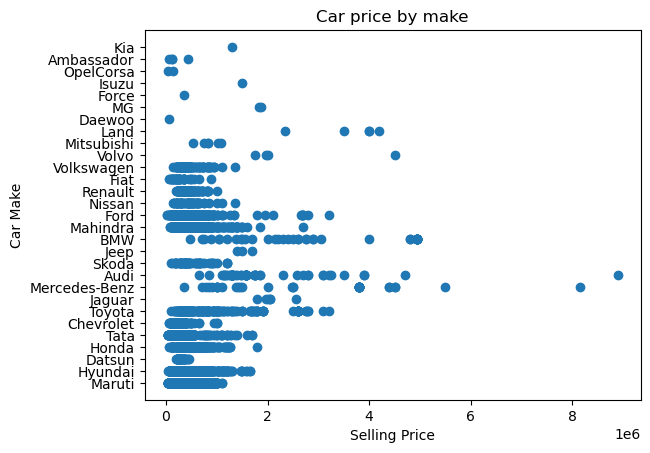

In [49]:
plt.scatter(price_var, make_var)
plt.title("Car price by make")
plt.xlabel("Selling Price")
plt.ylabel("Car Make")
plt.show()

Analysis: The car makes that have the highest selling prices are Mercedes-Benz, Audi, and BMW
In addition, the spread of selling prices for cars is highest with Mercedes-Benz, BMW, and Audi.

### Lets look at which cars people own the most now

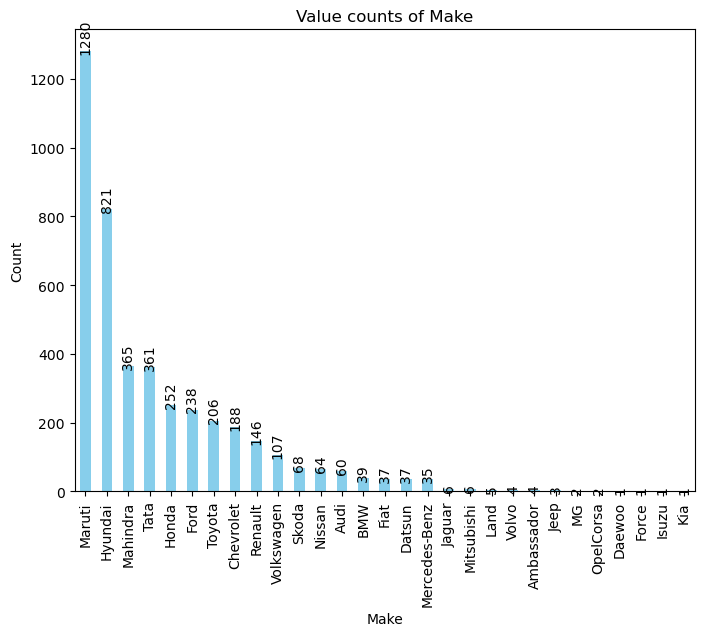

In [50]:
#We need to get value counts of all cars
counts = make_var.value_counts()

# We need to plot these in a chart, a bar chart
plt.figure(figsize=(8,6))
bars = make_var.value_counts().plot(kind='bar', color = 'skyblue')


#Add value labels on top of each bar
for i, v in enumerate(counts):
    bars.text(i, v +.1, str(v), ha = 'center', rotation = 90)

plt.xlabel("Make")
plt.ylabel("Count")
plt.title("Value counts of Make")
plt.show()

This clearly shows that Maruti with 1280 cars owned, is the most owned car out of all the cars in our data set with Hyundai being the second at 821 cars owned. What can also be seen here which is interesting is that the most expensive car Audi has only 60 owned and the second most expensive Mercedes-Benz had only 35. I would say there is an inverse relationsip between count of cars owned and price but that is not seen in the data because the least owned car manufactureres have selling prices towards the median.

## Lets find modality of the dataset

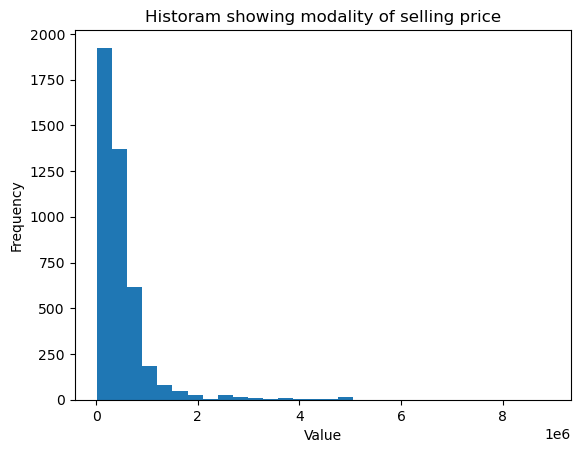

In [106]:
#Lets do a histogram
plt.hist(price_var, bins=30)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Historam showing modality of selling price')
plt.show()

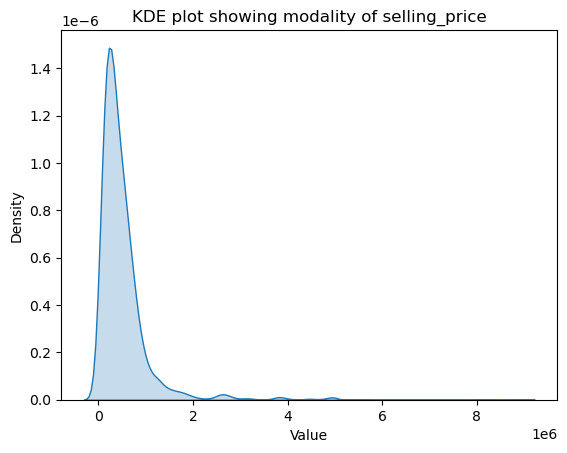

In [109]:

#Lets do a KDE
sb.kdeplot(price_var, fill = True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDE plot showing modality of selling_price')
plt.show()

Selling Price is clearly unimodolar 

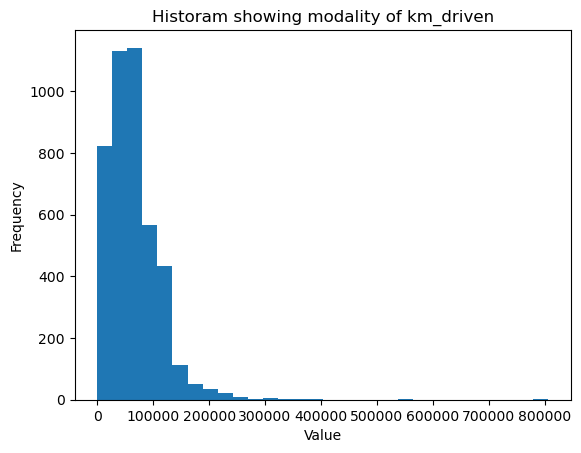

In [108]:
#Lets do histogram
plt.hist(km_driven_var, bins=30)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Historam showing modality of km_driven')
plt.show()

C:\Users\scott\AppData\Local\Temp\ipykernel_10988\1455807090.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(km_driven_var, shade = True)


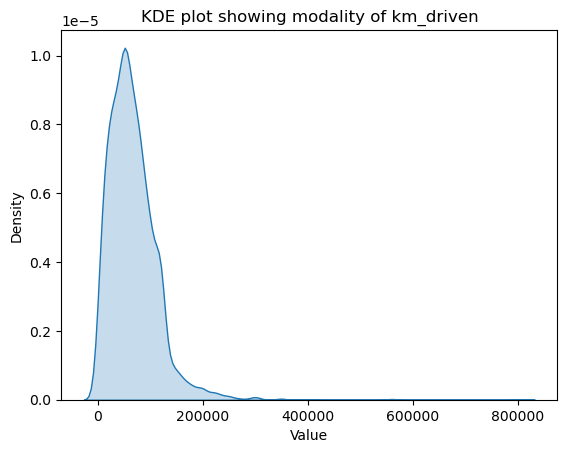

In [104]:
#Lets do a KDE
sb.kdeplot(km_driven_var, shade = True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDE plot showing modality of km_driven')
plt.show()

km_driven is unimodolar but not quite as unimodular as selling price

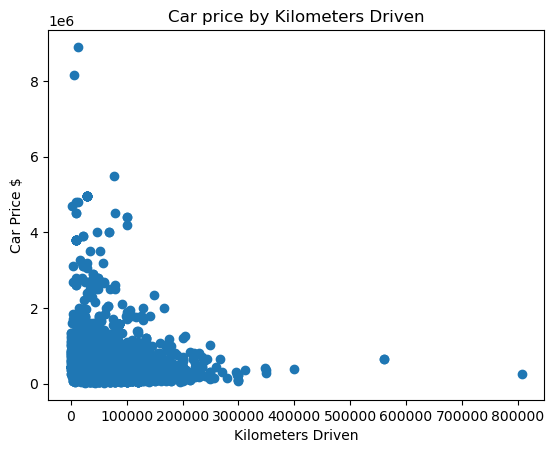

In [19]:

plt.scatter(km_driven_var, price_var)
plt.title("Car price by Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Car Price $")
plt.show()

Initial Analysis: Almost all of the cars that people bought have under 300,000 km_driven. The highest priced cars are under 
Both variables are numerical data types and they appear to have a relationship between them, good candidate for KMeans

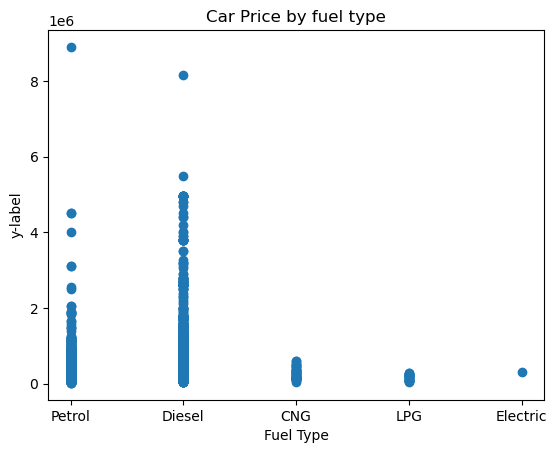

In [20]:

plt.scatter(fuel_var, price_var)
plt.title("Car Price by fuel type")
plt.xlabel("Fuel Type")
plt.ylabel("y-label")
plt.show()

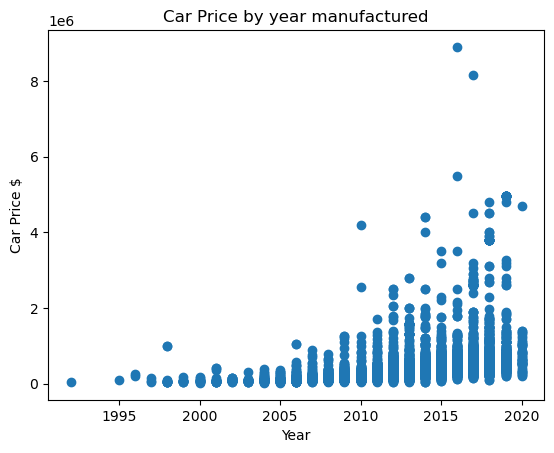

In [21]:

plt.scatter(year_var, price_var)
plt.title("Car Price by year manufactured")
plt.xlabel("Year")
plt.ylabel("Car Price $")
plt.show()

Two numerical values and a beautifully spread out scatter plot. An ideal candidate for KMeans cluster analysis. 

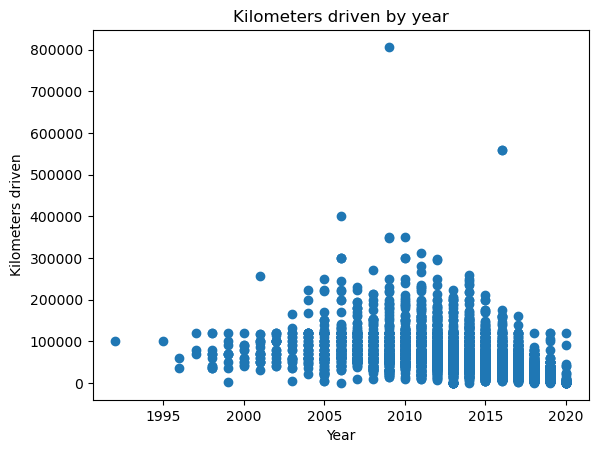

In [22]:
plt.scatter(year_var, km_driven_var)
plt.title("Kilometers driven by year")
plt.xlabel("Year")
plt.ylabel("Kilometers driven")
plt.show()

It is hard to see a relationship between year and km_driven. The data tends to show that between the years of 2005 and 2015 are the cars that have the most km_driven with a few cars outside thsoe years with high km_driven. In terms of being viable for KMeans clusters, the visual shows two numerical values and a beautifully spread out scatter plot. An ideal candidate for KMeans cluster analysis. 

## Lets do the KMeans cluster Analysis with km_driven and year

c:\Users\scott\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\scott\AppData\Local\Temp\ipykernel_10988\2149444593.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_driven['cluster'] = kmeans.labels_


,year,km_driven
0,2011.211484,93191.410460
1,2014.664854,35617.851046
2,2010.701571,200660.308901


<Axes: xlabel='year', ylabel='km_driven'>

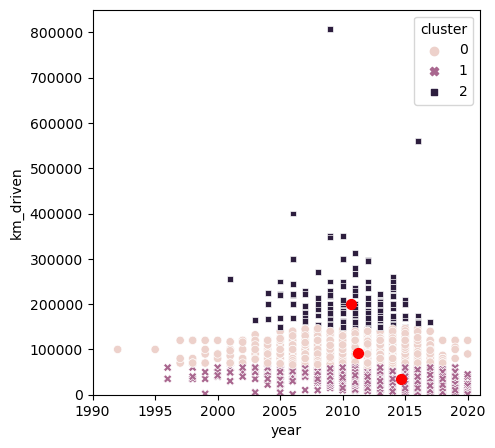

In [98]:
year_driven = cars_df[['year', 'km_driven']]
#plt.scatter(year_driven['selling_price'], year_driven['km_driven'])
#based off the initial scatter plot I am seeing 3-5 clusters 
kmeans = KMeans(n_clusters = 3).fit(year_driven)
#Cluster labels find which cluster each of the km_driven selling_price combinations fall under
year_driven['cluster'] = kmeans.labels_
year_driven
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['year', 'km_driven'])
display(centers)
fig, ax = plt.subplots(figsize =(5,5))
ax = sb.scatterplot(x='year', y='km_driven', hue='cluster', style = 'cluster',ax = ax, data = year_driven)
ax.set_xlim(1990, 2021)
ax.set_ylim(0, 850000)
centers.plot.scatter(x='year', y = 'km_driven', ax = ax, s=50, color = 'red')

The data shows this: The centers of each of the clusters breaks the cars into three categories: cars that have been driven around 50000 km, cars that have been driven right around 100000, and cars that have been driven around 200000 km. The centers of the years do not show us anything significant in this visual 

c:\Users\scott\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\scott\AppData\Local\Temp\ipykernel_10988\116567314.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driven_price['cluster'] = kmeans.labels_


,selling_price,km_driven
0,2.473640e+05,74309.270270
1,2.011895e+06,49621.836601
2,7.218835e+05,53302.684659
3,4.546293e+06,31106.609756


<Axes: xlabel='km_driven', ylabel='selling_price'>

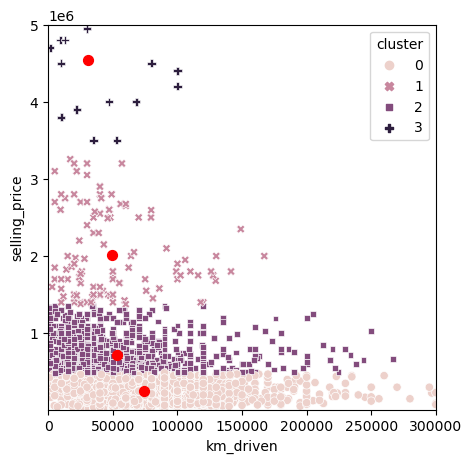

In [94]:
driven_price = cars_df[['selling_price', 'km_driven']]
#plt.scatter(driven_price['selling_price'], driven_price['km_driven'])
#based off the initial scatter plot I am seeing 3-5 clusters 
kmeans = KMeans(n_clusters = 4).fit(driven_price)
#Cluster labels find which cluster each of the km_driven selling_price combinations fall under
driven_price['cluster'] = kmeans.labels_
driven_price
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['selling_price', 'km_driven'])
display(centers)
fig, ax = plt.subplots(figsize =(5,5))
ax = sb.scatterplot(x='km_driven', y='selling_price', hue='cluster', style = 'cluster',ax = ax, data = driven_price)
ax.set_xlim(0, 300000)
ax.set_ylim(10000, 5000000)
centers.plot.scatter(x='km_driven', y = 'selling_price', ax = ax, s=50, color = 'red')

## Cluster KMeans Analysis Year vs Selling Price

In [23]:
#Divide the year selling price grouping into clusters, 
year_price_df = cars_df[['year', 'selling_price']]
display(year_price_df)
kmeans = KMeans(n_clusters = 3).fit(year_price_df)


,year,selling_price
0,2007,60000
1,2007,135000
2,2012,600000
3,2017,250000
4,2014,450000
...,...,...
4335,2014,409999
4336,2014,409999
4337,2009,110000
4338,2016,865000


c:\Users\scott\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
#Cluster labels find which cluster each of the year selling_price combinations fall under
year_price_df['cluster'] = kmeans.labels_
year_price_df

C:\Users\scott\AppData\Local\Temp\ipykernel_10988\3387101321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_price_df['cluster'] = kmeans.labels_


,year,selling_price,cluster
0,2007,60000,0
1,2007,135000,0
2,2012,600000,1
3,2017,250000,0
4,2014,450000,0
...,...,...,...
4335,2014,409999,0
4336,2014,409999,0
4337,2009,110000,0
4338,2016,865000,1


In [41]:
#learn the cluster centers
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['year', 'selling_price'])
centers

,year,selling_price
0,2011.961356,2.845000e+05
1,2017.032609,3.527859e+06
2,2016.026581,8.846773e+05


NameError: name 'centers' is not defined

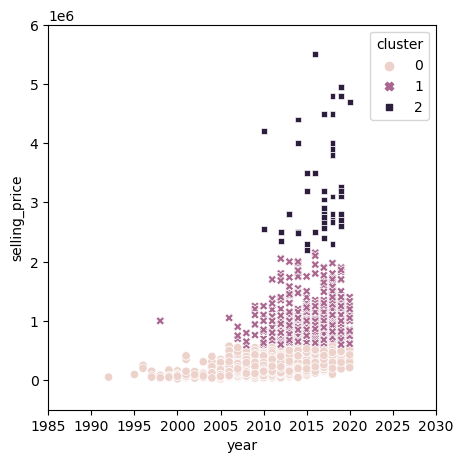

In [93]:
year_price_df
fig, ax = plt.subplots(figsize=(5,5))
ax = sb.scatterplot(x='year', y='selling_price', hue='cluster', style='cluster', ax=ax, data=year_price_df)
ax.set_xlim(1985, 2030)
ax.set_ylim(-500000, 6000000)
centers.plot.scatter(x='year', y='selling_price', ax=ax, s=50, color='red')


You can see from the above visual and plot that most of the values

#### Lets do more KMeans analysis but with km_driven and price

### Lets do KMeans with Year and km_driven

c:\Users\scott\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\scott\AppData\Local\Temp\ipykernel_39060\1231229164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_km_driven['cluster'] = kmeans.labels_


,year,km_driven,cluster
0,2007,70000,0
1,2007,50000,0
2,2012,100000,3
3,2017,46000,0
4,2014,141000,3
...,...,...,...
4335,2014,80000,0
4336,2014,80000,0
4337,2009,83000,0
4338,2016,90000,3


,year,km_driven
0,2012.373231,63238.275943
1,2010.398438,223113.617188
2,2015.801642,24074.906293
3,2010.812144,110406.358634


<Axes: xlabel='year', ylabel='km_driven'>

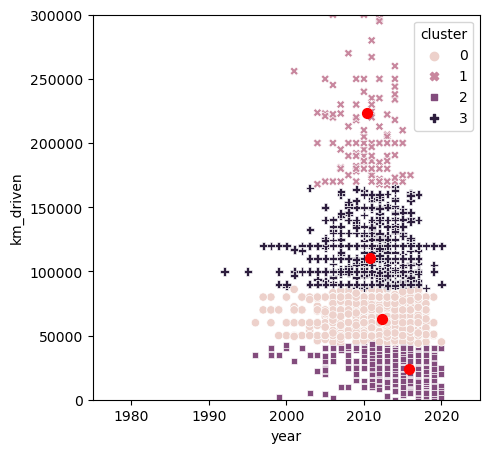

In [114]:
year_km_driven = cars_df[['year', 'km_driven']]
kmeans = KMeans(n_clusters= 4).fit(year_km_driven)
year_km_driven['cluster'] = kmeans.labels_
display(year_km_driven)
centers = pd.DataFrame(kmeans.cluster_centers_, columns = ['year', 'km_driven'])
display(centers)
fig, ax = plt.subplots(figsize = (5,5))
ax = sb.scatterplot(x='year', y = 'km_driven', hue = 'cluster', style='cluster',
                      ax = ax, data = year_km_driven)
ax.set_xlim(1975, 2025)
ax.set_ylim(0, 300000)
centers.plot.scatter(x='year', y='km_driven', ax = ax, s=50, color = 'red')